# Coles Stocks Price EDA and Functions

## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [12, 8]

## Load data

In [3]:
col = pd.read_csv('COL.csv', parse_dates=['Date'], index_col='Date')
col.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-21,12.49,13.37,12.30,12.75,8752527
2018-11-22,12.85,12.91,12.21,12.75,5673815
2018-11-23,12.75,12.85,12.62,12.84,5474121
2018-11-26,12.84,13.30,12.72,13.11,5085525
2018-11-27,13.05,13.13,12.75,12.89,6747945


In [4]:
col.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1313 entries, 2018-11-21 to 2024-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1313 non-null   float64
 1   High    1313 non-null   float64
 2   Low     1313 non-null   float64
 3   Close   1313 non-null   float64
 4   Volume  1313 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.5 KB


In [5]:
col.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.997472,0.997606,0.995272,-0.064779
High,0.997472,1.000000,0.996462,0.997841,-0.047922
Low,0.997606,0.996462,1.000000,0.997659,-0.079398
Close,0.995272,0.997841,0.997659,1.000000,-0.067405
Volume,-0.064779,-0.047922,-0.079398,-0.067405,1.000000


In [6]:
col.describe()

,Open,High,Low,Close,Volume
count,1313.000000,1313.000000,1313.000000,1313.000000,1.313000e+03
mean,16.323869,16.459379,16.188835,16.326078,3.458756e+06
std,1.922845,1.917111,1.910440,1.905385,3.973717e+06
min,11.190000,11.340000,11.120000,11.230000,1.358280e+05
25%,15.420000,15.530000,15.270000,15.430000,2.089479e+06
50%,16.720000,16.850000,16.570000,16.680000,2.709252e+06
75%,17.900000,18.010000,17.760000,17.870000,3.794312e+06
max,19.640000,19.650000,19.330000,19.380000,8.946384e+07


## DATA EDA

### Explore Data "Close" Prices only

#### Prepare the data

In [7]:
# Original close data
close_d_org = col[['Close']].copy()

In [8]:
# Original close data + fill in non-trading days
close_d = close_d_org.resample('D').ffill()

In [9]:
#weekly close data
close_w = close_d_org.resample('W').last()

In [10]:
#monthly data
close_m = close_d_org.resample('M').last()

#### Functions For EDA

In [11]:
def inspect_df(df):
    print('Inspect DataFrame:\n', df.head()) 
    print('\n')
    
def inspect_info(df):
    print('Inspect info:\n')
    df.info() 
    print('\n')
    
def plot_df(df):
    df.plot()
    plt.title('Data Visualization')
    plt.show()
    print('\n')
    
def decomposition_df(df, seasonal_period):
    decomposition = seasonal_decompose(df, period=seasonal_period)
    decomposition.plot()
    plt.title('Data Decomposition')
    plt.show()
    print('\n')
    
def rolling_mean(df, rolling_window):
    plt.figure(figsize=(14, 7))
    rolling = df.rolling(window=rolling_window).mean().dropna()
    plt.plot(rolling, label='rolling')
    plt.plot(df)
    plt.legend()
    plt.title('Rolling Mean')
    plt.xlabel('Date')
    plt.ylabel('Price')

def plot_acf_pacf(df, lags):
    fig, ax = plt.subplots(2, 1, figsize=(14, 12))
    plot_acf(df.dropna(), lags=lags, ax=ax[0], zero=False)
    ax[0].set_title('Autocorrelation Function')
    plot_pacf(df.dropna(), lags=lags, ax=ax[1], zero=False)
    ax[1].set_title('Partial Autocorrelation Function')
    plt.tight_layout()
    plt.show()
    
def plot_returns_distribution(df):
    returns = df.pct_change().dropna()
    plt.figure(figsize=(14, 7))
    sns.histplot(returns, kde=True, bins=50)
    plt.title('Returns Distribution')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.show()
    
def eda_df(df, seasonal_period, rolling_window, lags):
    inspect_df(df)
    inspect_info(df)
    plot_df(df)
    decomposition_df(df, seasonal_period)
    rolling_mean(df, rolling_window)
    plot_acf_pacf(df, lags)
    plot_returns_distribution(df)

##### Call the eda_df function for different data

## Data Transforming and Usecase

### Explore Data as a Whole

In [89]:
import mplfinance as mpf

def candlestick_chart(df, period='1M'):
    print('Candlestick Chart')
    df_period = df.resample(period).agg({'Open': 'first', 
                                         'High': 'max', 
                                         'Low': 'min', 
                                         'Close': 'last',
                                        'Volume': 'last'})
    mpf.plot(df_period, type='candle', style='charles', volume=True, show_nontrading=True)

Candlestick Chart


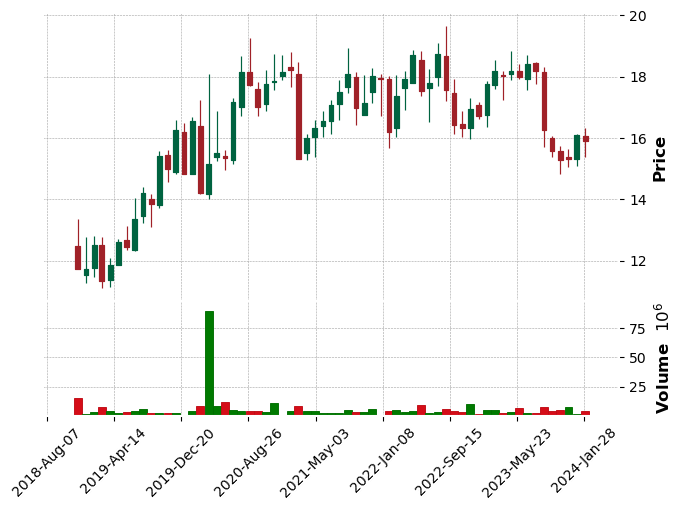

In [90]:
candlestick_chart(col, period='1M')

<Axes: xlabel='Date'>

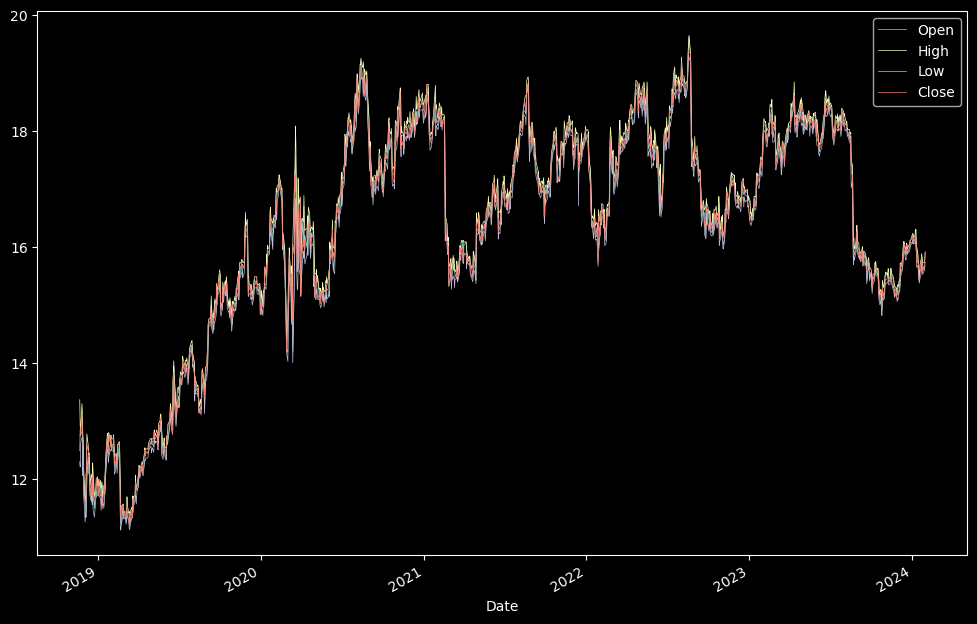

In [40]:
col.drop('Volume', axis=1).plot(linewidth=0.5)

<Axes: xlabel='Date'>

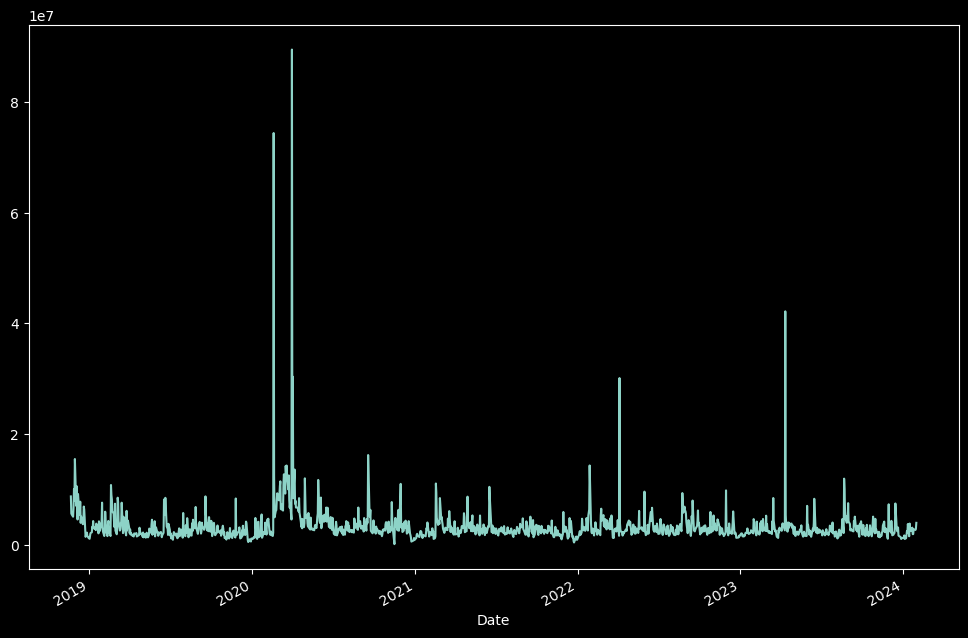

In [8]:
col['Volume'].plot()

#### Normaliing data to see more clear trend in volume

##### Normalizing data with MinMaxScaler (not helping)

In [9]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
col_nm = mmscaler.fit_transform(col) #array
col_nmdf = pd.DataFrame(col_nm, columns=col.columns, index=col.index)
col_nmdf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-21,0.153846,0.244284,0.143727,0.186503,0.096461
2018-11-22,0.196450,0.188929,0.132765,0.186503,0.061996
2018-11-23,0.184615,0.181709,0.182704,0.197546,0.059761
2018-11-26,0.195266,0.235860,0.194884,0.230675,0.055410
2018-11-27,0.220118,0.215403,0.198538,0.203681,0.074021


In [10]:
col_nmdf.describe()

,Open,High,Low,Close,Volume
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,0.607558,0.616050,0.617398,0.625286,0.037199
std,0.227556,0.230699,0.232697,0.233790,0.044485
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500592,0.504212,0.505481,0.515337,0.021871
50%,0.654438,0.663057,0.663825,0.668712,0.028809
75%,0.794083,0.802647,0.808770,0.814724,0.040956
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
col_nmdf.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.997472,0.997606,0.995272,-0.064779
High,0.997472,1.000000,0.996462,0.997841,-0.047922
Low,0.997606,0.996462,1.000000,0.997659,-0.079398
Close,0.995272,0.997841,0.997659,1.000000,-0.067405
Volume,-0.064779,-0.047922,-0.079398,-0.067405,1.000000


<Axes: xlabel='Date'>

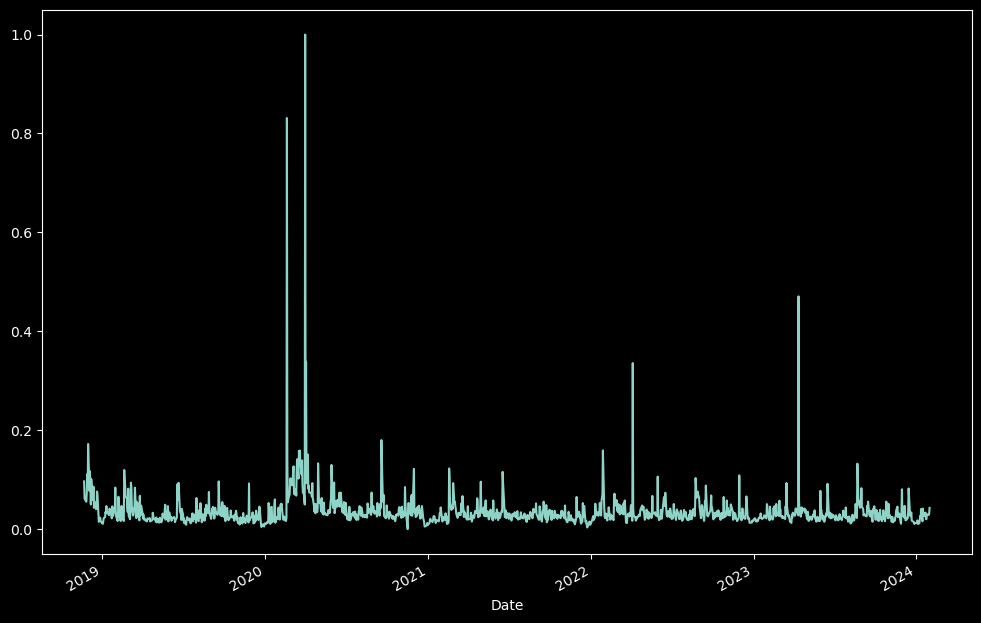

In [12]:
col_nmdf['Volume'].plot()

##### Z-score Normalization (not helping)

In [13]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
col_ss = sscaler.fit_transform(col)
col_ssdf = pd.DataFrame(col_ss, columns=col.columns, index=col.index)
col_ssdf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-21,-1.994612,-1.612091,-2.036345,-1.877542,1.332704
2018-11-22,-1.807318,-1.852127,-2.083473,-1.877542,0.557640
2018-11-23,-1.859344,-1.883436,-1.868781,-1.830289,0.507367
2018-11-26,-1.812520,-1.648618,-1.816417,-1.688532,0.409538
2018-11-27,-1.703266,-1.737327,-1.800708,-1.804038,0.828051


<Axes: xlabel='Date'>

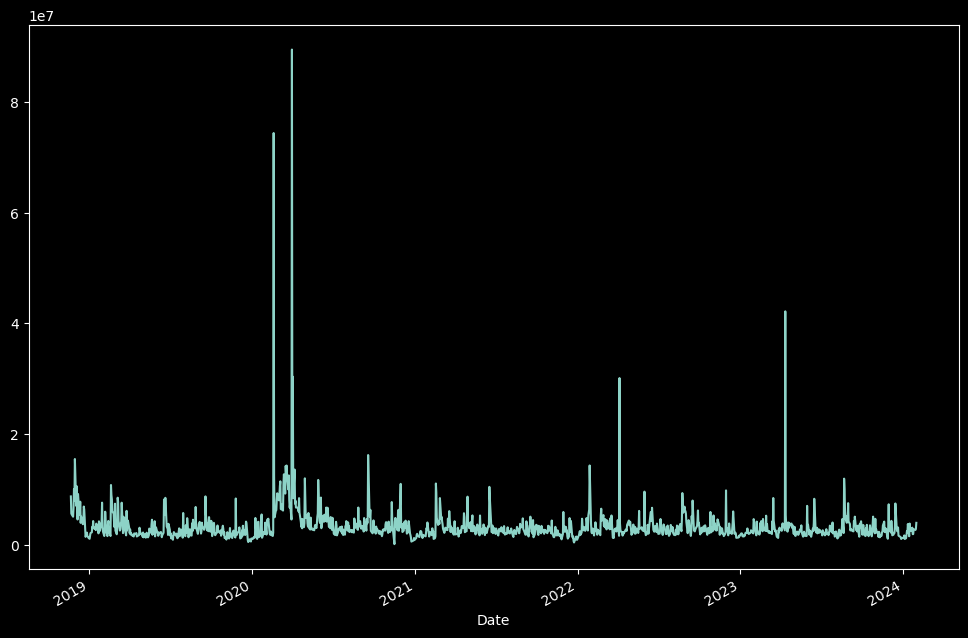

In [14]:
col['Volume'].plot()

##### Robust Scaler (not helping)

In [15]:
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
col_rs = rscaler.fit_transform(col)
col_rsdf = pd.DataFrame(col, columns=col.columns, index=col.index)
col_rsdf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-11-21,12.49,13.37,12.30,12.75,8752527
2018-11-22,12.85,12.91,12.21,12.75,5673815
2018-11-23,12.75,12.85,12.62,12.84,5474121
2018-11-26,12.84,13.30,12.72,13.11,5085525
2018-11-27,13.05,13.13,12.75,12.89,6747945


<Axes: xlabel='Date'>

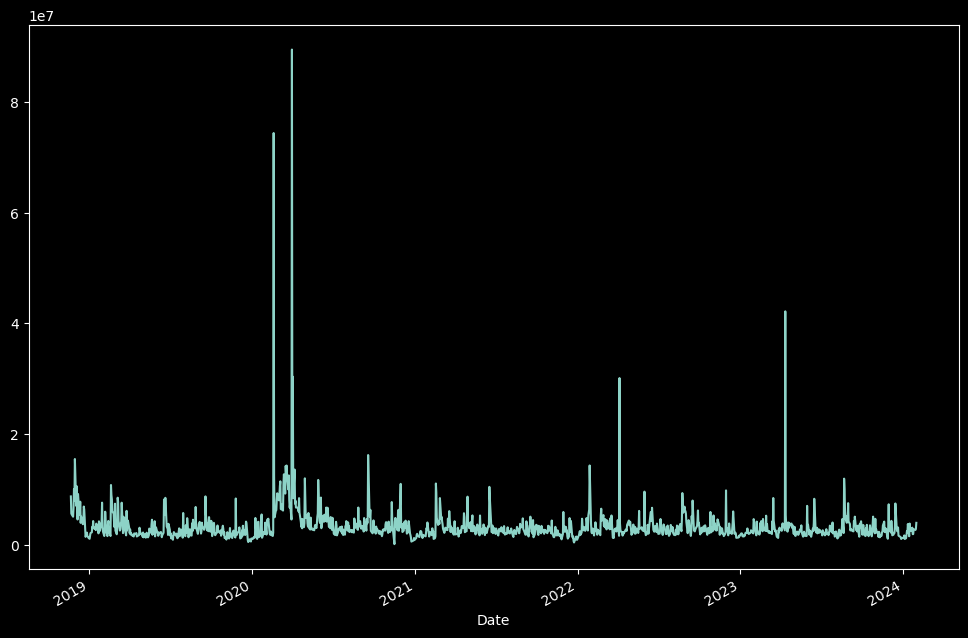

In [16]:
col_rsdf['Volume'].plot()

##### Winsorizing (not helping, try frequency fo the data next)

In [17]:
from scipy.stats.mstats import winsorize
#volume_winsorized = winsorize(data['Volume'], limits=[0.05, 0.05])
col_c = col.copy()
volume_ws = winsorize(col['Volume'], limits=[0.05, 0.05])
col_c['volume_ws'] = volume_ws
col_c.head()

,Open,High,Low,Close,Volume,volume_ws
Date,,,,,,
2018-11-21,12.49,13.37,12.30,12.75,8752527,7801056
2018-11-22,12.85,12.91,12.21,12.75,5673815,5673815
2018-11-23,12.75,12.85,12.62,12.84,5474121,5474121
2018-11-26,12.84,13.30,12.72,13.11,5085525,5085525
2018-11-27,13.05,13.13,12.75,12.89,6747945,6747945


<Axes: xlabel='Date'>

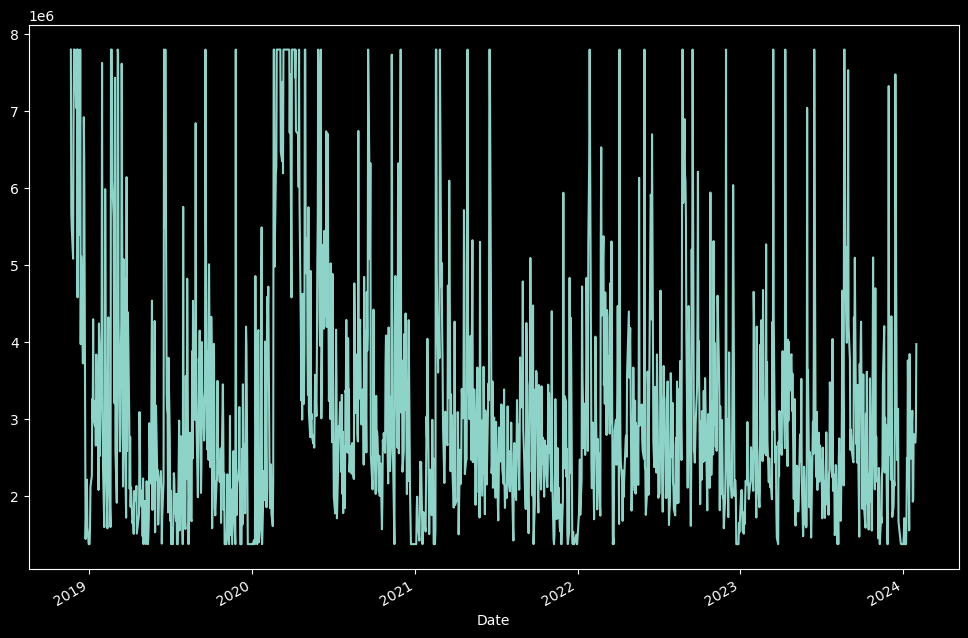

In [18]:
col_c['volume_ws'].plot()

## Other Functions